In [12]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [13]:
# Load Dataset
#iris
#dataset = load_iris()
target_value_name = 'class'

# Mushrooms
filename = 'mushrooms'
target_true = 'p'
target_false = 'e'
test_size = 0.33


data_file_name = f'../../data/{filename}.csv'
pandas_dataset = pd.read_csv(data_file_name)

pandas_dataset.columns = [sub.replace('%', '') for sub in pandas_dataset.columns]
target_value_name = pandas_dataset.columns[-1]

pandas_dataset[target_value_name] = pandas_dataset[target_value_name].map({target_false:0,target_true:1})

pandas_dataset.columns = [sub.replace('-', '_').replace(' ', '').replace('class', 'target_value') for sub in pandas_dataset.columns]
target_value_name = pandas_dataset.columns[-1]
feature_names = pandas_dataset.columns[0:-1]


#dataset.feature_names = [sub.replace(' ', '').replace('(cm)', '') for sub in dataset.feature_names]

pandas_dataset.head()

,cap_shape,cap_surface,cap_color,bruises3F,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,target_value
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


In [14]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
encoded_array = enc.fit_transform(pandas_dataset.loc[:,feature_names])
encoded_feature_names = enc.get_feature_names_out()
df_encoded = pd.DataFrame(encoded_array,columns=encoded_feature_names)
encoded_pandas_dataset = pd.concat([df_encoded, pandas_dataset],axis=1)
encoded_pandas_dataset.drop(labels= feature_names,axis=1,inplace=True)
encoded_pandas_dataset.head()

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,target_value
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:

from sklearn.utils import Bunch

X = encoded_pandas_dataset[encoded_feature_names]
y = encoded_pandas_dataset[target_value_name]

encoded_dataset = Bunch(
        data=X.to_numpy(),
        target=y.to_numpy(),
        target_names=target_value_name,
        feature_names=X.columns
)

#X_display = pandas_dataset.drop([target_value_name], axis=1)
#y_display = pandas_dataset[target_value_name]

#encoded_pandas_dataset = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']], columns= dataset['feature_names'] + ['target'])
#encoded_pandas_dataset.head()

In [16]:
#Define dataset
X_train, X_test, y_train, y_test = train_test_split(encoded_dataset.data, encoded_dataset.target, test_size=test_size, random_state=1)

print('Sizes (without target):')
print(f'Original size {encoded_dataset.data.shape}')
print(f'Train size {X_train.shape}')
print(f'Test size {X_test.shape}')

Sizes (without target):
Original size (8124, 117)
Train size (5443, 117)
Test size (2681, 117)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Define scorer
tree = RandomForestClassifier()

In [18]:
# Train the random forest classifier on the Iris dataset
tree.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = tree.predict(X_test)

In [19]:

# Initialize the explainer
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(X_test)


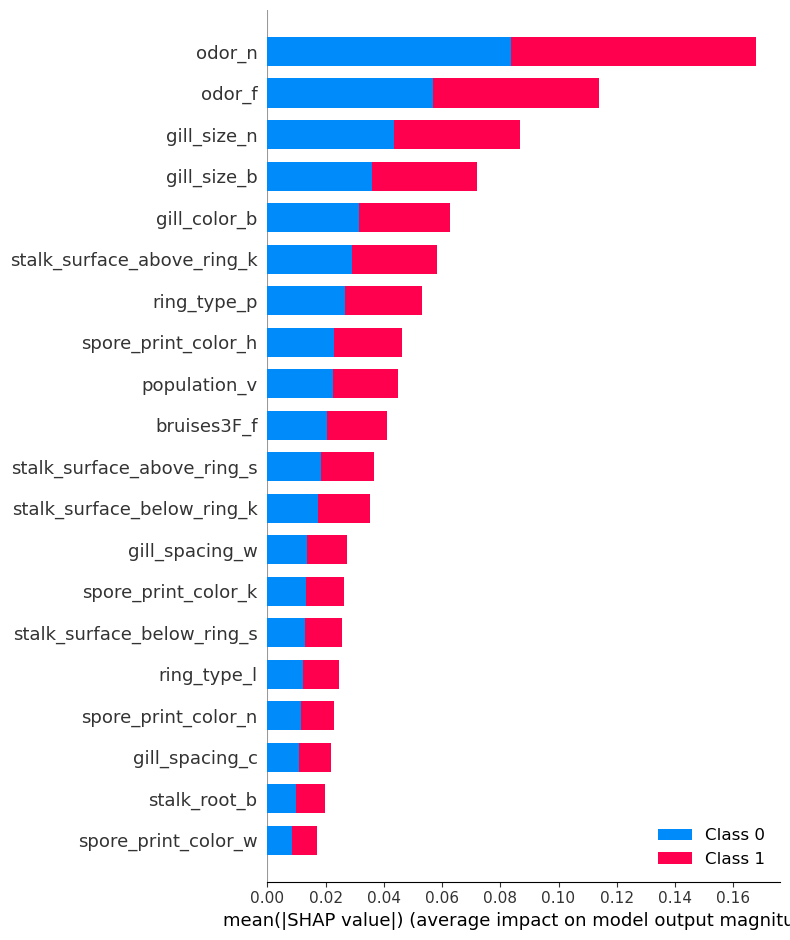

In [20]:
shap.summary_plot(shap_values, X)

In [21]:
import numpy as np

np_shap_values = np.array(shap_values)
print(np_shap_values.shape)
for shap_val in range(np_shap_values.shape[0]):
    np_shap_values = np_shap_values.mean(axis=0)
    print(np_shap_values.shape)



(2, 2681, 117)
(2681, 117)
(117,)


->Extract feature importance list


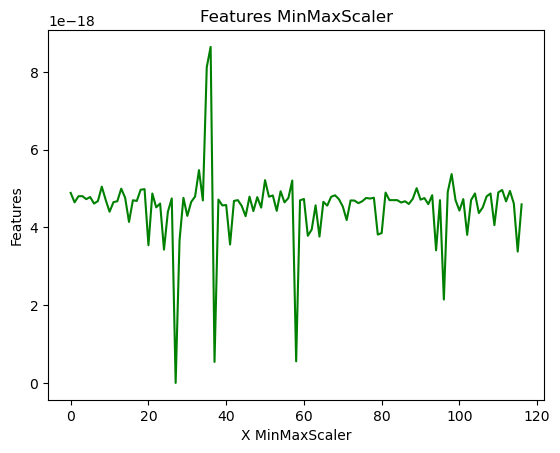

	 Original features 117
	 Selected features 0
	 Percentage of selected rules: 0.0 %


([],
 array([ 1.85702397e-19, -5.66241999e-20,  1.00155564e-19,  1.02708027e-19,
         2.53737076e-20,  8.04503584e-20, -8.75360054e-20, -2.38813689e-20,
         3.47090154e-19,  7.52172208e-21, -2.98069662e-19, -5.22841434e-20,
        -2.75726443e-20,  2.95007012e-19,  6.34952452e-20, -5.59682470e-19,
        -2.47885882e-21, -2.09372896e-20,  2.67505074e-19,  2.83289711e-19,
        -1.15937990e-18,  1.71218185e-19, -1.85620588e-19, -8.73508651e-20,
        -1.27273446e-18, -3.00187718e-19,  4.39029087e-20, -4.70238824e-18,
        -1.03357102e-18,  5.89921641e-20, -4.05473819e-19, -4.63375361e-20,
         9.30968510e-20,  7.71917775e-19, -7.92628220e-21,  3.41946285e-18,
         3.94178867e-18, -4.16210696e-18,  1.52434337e-20, -1.35792398e-19,
        -1.25774599e-19, -1.14119045e-18, -2.00280166e-20,  0.00000000e+00,
        -1.49609129e-19, -4.12823828e-19,  8.90899523e-20, -2.82196877e-19,
         7.78341450e-20, -1.92291012e-19,  5.14296227e-19,  8.84327988e-20,
       

In [22]:
from SRules.Utils import FeatureImportance

FeatureImportance.get_top_important_features_list(np_shap_values, encoded_dataset.feature_names, 0.2,True, True)


